2
       2      Pi x
(-4 + x ) Sin[-----]
                6
--------------------
            2
      -1 + x
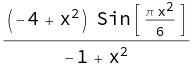

In [1]:
tasks := {
    Sin[2 * x ^ 3] ^ 2 / x ^ 3,
    (x ^ 2 - 4) * Sin[(Pi * (x ^ 2)) / 6] / (x ^ 2 - 1),
    Sqrt[Abs[3 * x ^ 3 + 2 * x ^ 2 - 10 * x]] / (4 * x),
    1 / 2 * Log[Sqrt[x ^ 2 + 1] / Sqrt[x ^ 2 - 1]] - 15 * x ^ 2,
    (x ^ 3 - x ^ 2 - x + 1) ^ (1 / 3) / Tan[x],
    2 * Log[(x - 1) / x] + 1,
    Log[x - 1] / (x - 1) ^ 2
}

getVariantForNumber[number_, variationsQuo_]:=(
    Module[{t},
        t = Mod[number , variationsQuo];
        If[t != 0
                , t
                , variationsQuo
            ]
    ]
)

yourNumber := 9
numberOfYourTask := getVariantForNumber[yourNumber, Length[tasks]]
y[x_] := tasks[[numberOfYourTask]]

y[x_]

### Построить график

-Graphics-
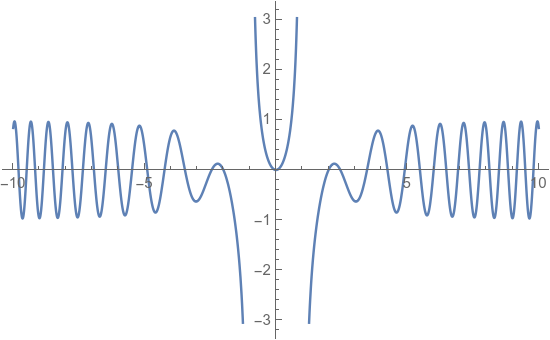

In [7]:
Plot[y[x], {x, -10, 10}]

### Область определения функции

In [8]:
u[x] := x ^ 2 - 1
rootsNull := Solve[u[x] == 0, x]

rootsNull

{{x -> -1}, {x -> 1}}

### Является ли функция четной, нечетной, прочей

In [11]:
v := y[x] - y[-x]
Print["y(x) - y(-x) = ", v]

y(x) - y(-x) = 0


y(x) = y(-x), поэтому функция y(x) является чётной

### Периодичность функции

In [13]:
Print["T = ", FunctionPeriod[y[x], x]]

T = 0


Период функции не может быть равен нулю, поэтому функция не периодична

### Точки пересечения графика с осями координат

Пересечение с осью Ox.

(C[1] ∈ Integers && (x == -2 Sqrt[3] Sqrt[C[1]] || x == 2 Sqrt[3] Sqrt[C[1]] || 
 
                    6                                      6
>       x == -(Sqrt[--] Sqrt[Pi + 2 Pi C[1]]) || x == Sqrt[--] Sqrt[Pi + 2 Pi C[1]])) || 
                    Pi                                     Pi
 
>   x == -2 || x == 2
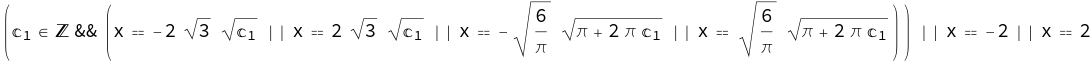

In [14]:
rootsAll := Reduce[y[x] == 0, x]

rootsAll

Wolfram нашёл аналитические корни -2 и 2 и показал, что есть корни для синуса. Найдём их численно, учитывая разрывы в -1 и 1

In [16]:
roots0 := List[
    {x -> -2},
    {x -> -1},
    {x -> 0},
    {x -> 1},
    {x -> 2},
    FindRoot[y[x] == 0, {x, 2.3}],
    FindRoot[y[x] == 0, {x, 3.4}]
]

x1 := -2
x2 := -1
x3 := 0
x4 := 1
x5 := 2
x6 := 2.44949
x7 := 3.4641

roots0

{{x -> -2}, {x -> -1}, {x -> 0}, {x -> 1}, {x -> 2}, {x -> 2.44949}, {x -> 3.4641}}

Пересечение с осью Oy.

In [25]:
Print["y(0) = ", y[x] /. x -> 0]

y(0) = 0


### Промежутки знакопостоянства

-Graphics-
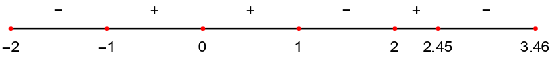

In [26]:
margin := 0.2

Show[
    Graphics[Line[{{x1, 0}, {x7, 0}}]],
    Graphics[Point[{x1, 0}, VertexColors->Red]],
    Graphics[Text["-2", {x1, -margin}]],
    Graphics[Point[{x2, 0}, VertexColors->Red]],
    Graphics[Text["-1", {x2, -margin}]],
    Graphics[Point[{x3, 0}, VertexColors->Red]],
    Graphics[Text["0", {x3, -margin}]],
    Graphics[Point[{x4, 0}, VertexColors->Red]],
    Graphics[Text["1", {x4, -margin}]],
    Graphics[Point[{x5, 0}, VertexColors->Red]],
    Graphics[Text["2", {x5, -margin}]],
    Graphics[Point[{x6, 0}, VertexColors->Red]],
    Graphics[Text["2.45", {x6, -margin}]],
    Graphics[Point[{x7, 0}, VertexColors->Red]],
    Graphics[Text["3.46", {x7, -margin}]],
    Graphics[Text["-", {(x1 + x2) / 2, margin}]],
    Graphics[Text["+", {(x2 + x3) / 2, margin}]],
    Graphics[Text["+", {(x3 + x4) / 2, margin}]],
    Graphics[Text["-", {(x4 + x5) / 2, margin}]],
    Graphics[Text["+", {(x5 + x6) / 2, margin}]],
    Graphics[Text["-", {(x6 + x7) / 2, margin}]]
]

### Промежутки возрастания и убывания

2                          2                2
            2      Pi x                2      Pi x             Pi x
Pi x (-4 + x ) Cos[-----]   2 x (-4 + x ) Sin[-----]   2 x Sin[-----]
                     6                          6                6
------------------------- - ------------------------ + -------------- == 0
                2                         2 2                   2
       3 (-1 + x )                 (-1 + x )              -1 + x
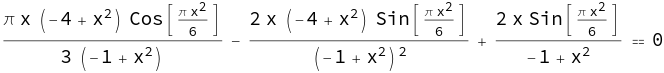

In [28]:
dy := D[y[x], x]

dy == 0

Wolfram не может найти корни аналитически, найдём числено

In [30]:
(* Проблемы с построением графика производной. Ничего из письма не помогло *)
(* Plot[dy, {x, -10, 10}] *)

In [32]:
FindRoot[dy == 0, {x, -3.1}]
dx1 := -3.04156

FindRoot[dy == 0, {x, -2.3}]
dx2 := -2.21885

dx3 := -1

FindRoot[dy == 0, {x, -0.1}]
dx4 := 0

dx5 := 1

FindRoot[dy == 0, {x, 2.2}]
dx6 := 2.21885

FindRoot[dy == 0, {x, 3.0}]
dx7 := 3.04156

{x -> -3.04156}
{x -> -2.21885}
                 -21
{x -> -1.36319 10   }
{x -> 2.21885}
{x -> 3.04156}

-Graphics-
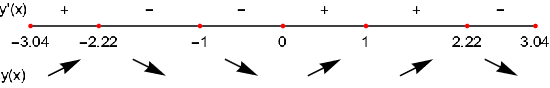

In [44]:
margin := 0.2

Show[
    Graphics[Line[{{dx1, 0}, {dx7, 0}}]],
    Graphics[Point[{dx1, 0}, VertexColors->Red]],
    Graphics[Text["-3.04", {dx1, -margin}]],
    Graphics[Point[{dx2, 0}, VertexColors->Red]],
    Graphics[Text["-2.22", {dx2, -margin}]],
    Graphics[Point[{dx3, 0}, VertexColors->Red]],
    Graphics[Text["-1", {dx3, -margin}]],
    Graphics[Point[{dx4, 0}, VertexColors->Red]],
    Graphics[Text["0", {dx4, -margin}]],
    Graphics[Point[{dx5, 0}, VertexColors->Red]],
    Graphics[Text["1", {dx5, -margin}]],
    Graphics[Point[{dx6, 0}, VertexColors->Red]],
    Graphics[Text["2.22", {dx6, -margin}]],
    Graphics[Point[{dx7, 0}, VertexColors->Red]],
    Graphics[Text["3.04", {dx7, -margin}]],
    Graphics[Text["y'(x)", {dx1 - margin, margin}]],
    Graphics[Text["y(x)", {dx1 - margin, -3 * margin}]],
    Graphics[Text["+", {(dx1 + dx2) / 2, margin}]],
    Graphics[Arrow[{{(dx1 + dx2) / 2 - margin, -3 * margin}, {(dx1 + dx2) / 2 + margin, -2 * margin}}]],
    Graphics[Text["-", {(dx2 + dx3) / 2, margin}]],
    Graphics[Arrow[{{(dx2 + dx3) / 2 - margin, -2 * margin}, {(dx2 + dx3) / 2 + margin, -3 * margin}}]],
    Graphics[Text["-", {(dx3 + dx4) / 2, margin}]],
    Graphics[Arrow[{{(dx3 + dx4) / 2 - margin, -2 * margin}, {(dx3 + dx4) / 2 + margin, -3 * margin}}]],
    Graphics[Text["+", {(dx4 + dx5) / 2, margin}]],
    Graphics[Arrow[{{(dx4 + dx5) / 2 - margin, -3 * margin}, {(dx4 + dx5) / 2 + margin, -2 * margin}}]],
    Graphics[Text["+", {(dx5 + dx6) / 2, margin}]],
    Graphics[Arrow[{{(dx5 + dx6) / 2 - margin, -3 * margin}, {(dx5 + dx6) / 2 + margin, -2 * margin}}]],
    Graphics[Text["-", {(dx6 + dx7) / 2, margin}]],
    Graphics[Arrow[{{(dx6 + dx7) / 2 - margin, -2 * margin}, {(dx6 + dx7) / 2 + margin, -3 * margin}}]]
]

### Точки экстремума и значения в этих точках

In [46]:
Print["y''(-3.04) = ", D[y[x], x, x] /. x -> dx1, " => minimum, y(-3.04) = ", y[x] /. x -> dx1]
Print["y''(-2.22) = ", D[y[x], x, x] /. x -> dx2, " => maximum, y(-2.22) = ", y[x] /. x -> dx2]
Print["y''(0) = ", D[y[x], x, x] /. x -> dx4, " => minimum, y(0) = ", y[x] /. x -> dx4]
Print["y''(2.22) = ", D[y[x], x, x] /. x -> dx6, " => maximum, y(-2.22) = ", y[x] /. x -> dx6]
Print["y''(3.04) = ", D[y[x], x, x] /. x -> dx7, " => minimum, y(3.04) = ", y[x] /. x -> dx7]

y''(-3.04) = 7.01633 => minimum, y(-3.04) = -0.63092
y''(-2.22) = -5.12196 => maximum, y(-2.22) = 0.125757
         4 Pi
y''(0) = ---- => minimum, y(0) = 0
          3
y''(2.22) = -5.12196 => maximum, y(-2.22) = 0.125757
y''(3.04) = 7.01633 => minimum, y(3.04) = -0.63092


### Непрерывность. Наличие точек разрыва и их классификация

In [51]:
Print["lim [x -> -1 + 0] y(x) = ", Limit[y[x], x -> -1, Direction -> "FromAbove"]]
Print["lim [x -> -1 - 0] y(x) = ", Limit[y[x], x -> -1, Direction -> "FromBelow"]]

lim [x -> -1 + 0] y(x) = Infinity
lim [x -> -1 - 0] y(x) = -Infinity


Разрыв 2 рода в x = -1.

In [53]:
Print["lim [x -> 1 + 0] y(x) = ", Limit[y[x], x -> 1, Direction -> "FromAbove"]]
Print["lim [x -> 1 - 0] y(x) = ", Limit[y[x], x -> 1, Direction -> "FromBelow"]]

lim [x -> 1 + 0] y(x) = -Infinity
lim [x -> 1 - 0] y(x) = Infinity


Разрыв 2 рода в x = 1.

### Горизонтальные асимптоты

In [55]:
Print["lim [x -> +Infinity] y(x) = ", Limit[y[x], x -> +Infinity]]
Print["lim [x -> -Infinity] y(x) = ", Limit[y[x], x -> -Infinity]]

lim [x -> +Infinity] y(x) = Indeterminate
lim [x -> -Infinity] y(x) = Indeterminate


Пределы не существуют, горизонтальных асимптот нет.

### График функции с асимптотами

-Graphics-
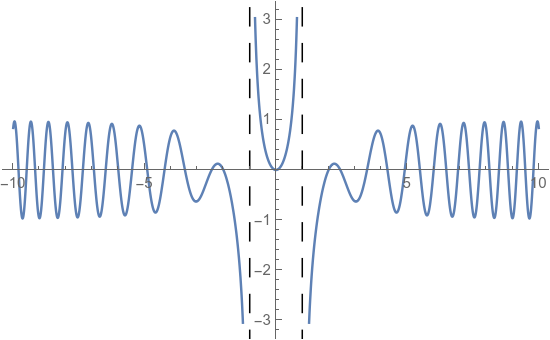

In [57]:
Show[
    Plot[y[x], {x, -10, 10}],
    Graphics[{Dashing[{.05}], Line[{{-1, -10}, {-1, 10}}]}],
    Graphics[{Dashing[{.05}], Line[{{1, -10}, {1, 10}}]}]
]